# BE175 Final Project Narek Koucherian


# Extremely High Mutation Rate of HIV-1 in Vivo

PLSR analysis and LOOCV analysis

In [1]:
%matplotlib inline
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt


Plotting NSMTs vs Stop Codon Mutation

0.008157280726806255
0.004011439744733452


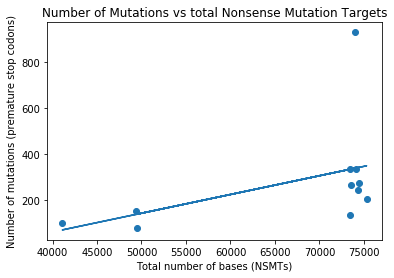

In [56]:
#Patient List:
# 1(R3), 2(R5), 3(R6), 4(R7), 5(R8), 6(R11),
# 7(R14), 8(R15), 9(R4), 10(R9), 11(P6)

X = NSMT_tot = np.array([73450,49500,73500,75300,41100,74300,74400,73950,49350,73400,74100],dtype=np.float64)
Y = stop_tot = np.array([137,79,266,206,100,245,277,931,155,338,335],dtype=np.float64)

plt.scatter(NSMT_tot,stop_tot)
plt.xlabel('Total number of bases (NSMTs)')
plt.ylabel('Number of mutations (premature stop codons)')

def best_fit_slope_and_intercept(xs,ys):
    m = (((np.mean(xs)*np.mean(ys)) - np.mean(xs*ys)) / ((np.mean(xs)*np.mean(xs)) - np.mean(xs*xs)))
    b = np.mean(ys) - m*np.mean(xs)    
    return m, b

m, b = best_fit_slope_and_intercept(X,Y)
R = regression_line = [(m*x)+b for x in X]
plt.plot(X, regression_line)
plt.title('Number of Mutations vs total Nonsense Mutation Targets')
Estimated_Avg_Mutation_Rate = EAMR = (R[10] - R[0])/(X[10]-X[0])
print(EAMR)

#Avg of each rate
Z= np.divide(Y,X)
print(sum(Z)/len(Z))

The above plot was created to help visualize the total mutation rate data. The paper calculates mutation rate by dividing the total number of mutations by the totla number of NSMTs. The x-axis shows the total NSMTs (nonsense mutation targets) while the y-axis shows the number of mutations. Each data point corresponds to 1 of the 11 patients. Although the average mutation rate for all 11 patients was 4.01E-3, the slope of our line of best fit is given as 8.16E-3, almost double the true average mutation rate.

Rate and Fraction correlation

<Figure size 432x288 with 0 Axes>

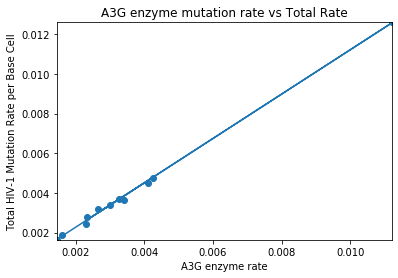

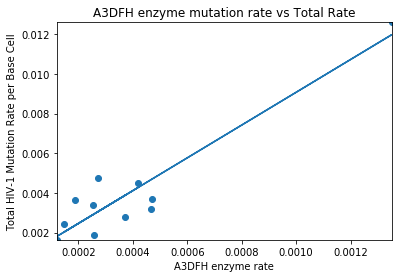

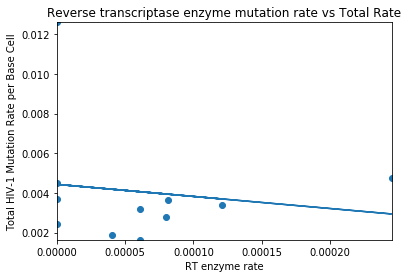

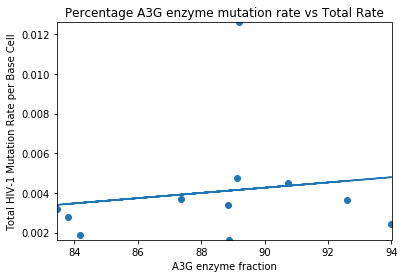

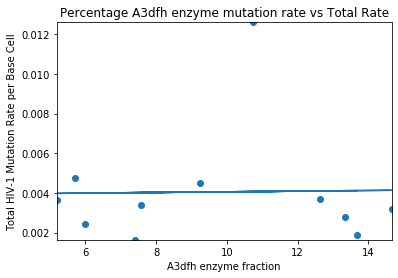

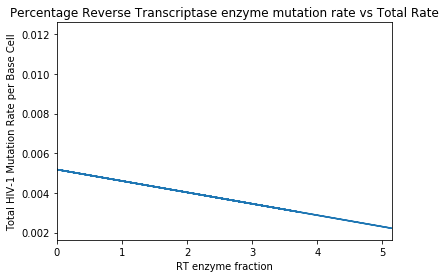

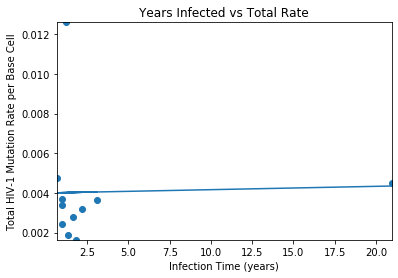

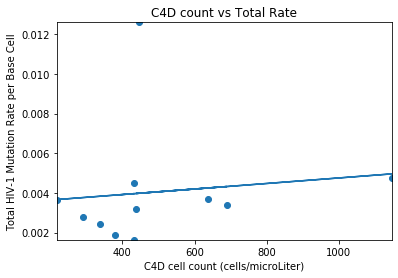

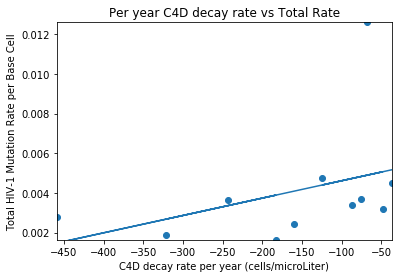

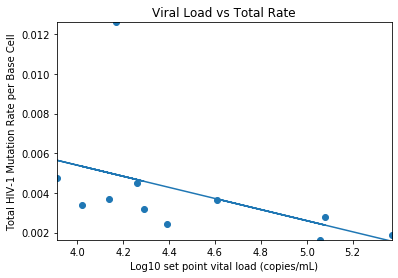

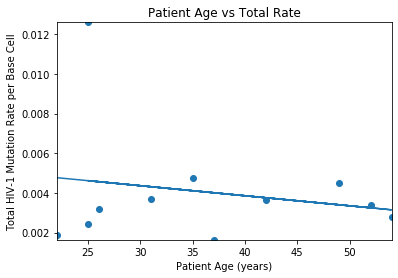

<Figure size 432x288 with 0 Axes>

In [8]:
total_rate= np.array([1.89E-03,1.64E-03,3.67E-03,2.79E-03,2.43E-03,3.38E-03,3.72E-03,1.26E-02,3.18E-03,4.77E-03,4.52E-03],dtype=np.float64)
rate_3g= np.array([1.59E-03,1.45E-03,3.40E-03,2.34E-03,2.29E-03,3.00E-03,3.25E-03,1.12E-02,2.65E-03,4.25E-03,4.10E-03],dtype=np.float64)
rate_3dfh= np.array([2.59E-04,1.21E-04,1.90E-04,3.72E-04,1.46E-04,2.56E-04,4.70E-04,1.35E-03,4.66E-04,2.72E-04,4.18E-04],dtype=np.float64)
rate_rt= np.array([4.08E-05,6.06E-05,8.16E-05,7.97E-05,0.00E+00,1.21E-04,0.00E+00,0.00E+00,6.08E-05,2.45E-04,0.00E+00],dtype=np.float64)
fraction_3g= np.array([84.17,88.89,92.59,83.81,94.00,88.84,87.36,89.2,83.44,89.14,90.75],dtype=np.float64)
fraction_3dfh= np.array([13.67,7.41,5.19,13.33,6.00,7.57,12.64,10.74,14.65,5.71,9.25],dtype=np.float64)
fraction_rt= np.array([2.16,3.70,2.22,2.86,0.00,3.59,0.00,0.00,1.91,5.14,0.00],dtype=np.float64)
infection_time = np.array([1.31,1.82,3.10,1.63,1.00,0.96,1,1.24,2.16,0.65,20.94],dtype=np.float64)
cd4_count = np.array([380,432,218,291,338,689,637,446,439,1146,431],dtype=np.float64)
cd4_decay = np.array([-321,-183,-243,-459,-160,-87,-76,-68,-48,-124,-37],dtype=np.float64)
log10_viral_load = np.array([5.37,5.06,4.61,5.08,4.39,4.02,4.14,4.17,4.29,3.91,4.26],dtype=np.float64)
age = np.array([22,37,42,54,25,52,31,25,26,35,49],dtype=np.float64)


plt.scatter(rate_3g,total_rate)
plt.title('A3G enzyme mutation rate vs Total Rate')
plt.xlabel('A3G enzyme rate')
plt.ylabel('Total HIV-1 Mutation Rate per Base Cell')
plt.ylim(min(total_rate),max(total_rate))
plt.xlim(min(rate_3g),max(rate_3g))
m, b = best_fit_slope_and_intercept(rate_3g,total_rate)
R = regression_line = [(m*x)+b for x in rate_3g]
plt.plot(rate_3g, R)
plt.figure()

plt.scatter(rate_3dfh,total_rate)
plt.title('A3DFH enzyme mutation rate vs Total Rate')
plt.xlabel('A3DFH enzyme rate')
plt.ylabel('Total HIV-1 Mutation Rate per Base Cell')
plt.ylim(min(total_rate),max(total_rate))
plt.xlim(min(rate_3dfh),max(rate_3dfh))
m, b = best_fit_slope_and_intercept(rate_3dfh,total_rate)
R = regression_line = [(m*x)+b for x in rate_3dfh]
plt.plot(rate_3dfh, R)
plt.figure()

plt.scatter(rate_rt,total_rate)
plt.title('Reverse transcriptase enzyme mutation rate vs Total Rate')
plt.xlabel('RT enzyme rate')
plt.ylabel('Total HIV-1 Mutation Rate per Base Cell')
plt.ylim(min(total_rate),max(total_rate))
plt.xlim(min(rate_rt),max(rate_rt))
m, b = best_fit_slope_and_intercept(rate_rt,total_rate)
R = regression_line = [(m*x)+b for x in rate_rt]
plt.plot(rate_rt, R)
plt.figure()

plt.scatter(fraction_3g,total_rate)
plt.title('Percentage A3G enzyme mutation rate vs Total Rate')
plt.xlabel('A3G enzyme fraction')
plt.ylabel('Total HIV-1 Mutation Rate per Base Cell')
plt.ylim(min(total_rate),max(total_rate))
plt.xlim(min(fraction_3g),max(fraction_3g))
m, b = best_fit_slope_and_intercept(fraction_3g,total_rate)
R = regression_line = [(m*x)+b for x in fraction_3g]
plt.plot(fraction_3g, R)
plt.figure()

plt.scatter(fraction_3dfh,total_rate)
plt.title('Percentage A3dfh enzyme mutation rate vs Total Rate')
plt.xlabel('A3dfh enzyme fraction')
plt.ylabel('Total HIV-1 Mutation Rate per Base Cell')
plt.ylim(min(total_rate),max(total_rate))
plt.xlim(min(fraction_3dfh),max(fraction_3dfh))
m, b = best_fit_slope_and_intercept(fraction_3dfh,total_rate)
R = regression_line = [(m*x)+b for x in fraction_3dfh]
plt.plot(fraction_3dfh, R)
plt.figure()

plt.scatter(fraction_3g,total_rate)
plt.title('Percentage Reverse Transcriptase enzyme mutation rate vs Total Rate')
plt.xlabel('RT enzyme fraction')
plt.ylabel('Total HIV-1 Mutation Rate per Base Cell')
plt.ylim(min(total_rate),max(total_rate))
plt.xlim(min(fraction_rt),max(fraction_rt))
m, b = best_fit_slope_and_intercept(fraction_rt,total_rate)
R = regression_line = [(m*x)+b for x in fraction_rt]
plt.plot(fraction_rt, R)
plt.figure()

plt.scatter(infection_time,total_rate)
plt.title('Years Infected vs Total Rate')
plt.xlabel('Infection Time (years)')
plt.ylabel('Total HIV-1 Mutation Rate per Base Cell')
plt.ylim(min(total_rate),max(total_rate))
plt.xlim(min(infection_time),max(infection_time))
m, b = best_fit_slope_and_intercept(infection_time,total_rate)
R = regression_line = [(m*x)+b for x in infection_time]
plt.plot(infection_time, R)
plt.figure()

plt.scatter(cd4_count,total_rate)
plt.title('C4D count vs Total Rate')
plt.xlabel('C4D cell count (cells/microLiter)')
plt.ylabel('Total HIV-1 Mutation Rate per Base Cell')
plt.ylim(min(total_rate),max(total_rate))
plt.xlim(min(cd4_count),max(cd4_count))
m, b = best_fit_slope_and_intercept(cd4_count,total_rate)
R = regression_line = [(m*x)+b for x in cd4_count]
plt.plot(cd4_count, R)
plt.figure()

plt.scatter(cd4_decay,total_rate)
plt.title('Per year C4D decay rate vs Total Rate')
plt.xlabel('C4D decay rate per year (cells/microLiter)')
plt.ylabel('Total HIV-1 Mutation Rate per Base Cell')
plt.ylim(min(total_rate),max(total_rate))
plt.xlim(min(cd4_decay),max(cd4_decay))
m, b = best_fit_slope_and_intercept(cd4_decay,total_rate)
R = regression_line = [(m*x)+b for x in cd4_decay]
plt.plot(cd4_decay, R)
plt.figure()

plt.scatter(log10_viral_load,total_rate)
plt.title('Viral Load vs Total Rate')
plt.xlabel('Log10 set point vital load (copies/mL)')
plt.ylabel('Total HIV-1 Mutation Rate per Base Cell')
plt.ylim(min(total_rate),max(total_rate))
plt.xlim(min(log10_viral_load),max(log10_viral_load))
m, b = best_fit_slope_and_intercept(log10_viral_load,total_rate)
R = regression_line = [(m*x)+b for x in log10_viral_load]
plt.plot(log10_viral_load, R)
plt.figure()

plt.scatter(age,total_rate)
plt.title('Patient Age vs Total Rate')
plt.xlabel('Patient Age (years)')
plt.ylabel('Total HIV-1 Mutation Rate per Base Cell')
plt.ylim(min(total_rate),max(total_rate))
plt.xlim(min(age),max(age))
m, b = best_fit_slope_and_intercept(age,total_rate)
R = regression_line = [(m*x)+b for x in age]
plt.plot(age, R)
plt.figure()

These plots were created to help visualize the correlation between each of our 11 variables and the final "total mutation rate" data set. The two variables most directly correlated with total mutation rate are rate_3g and rate_3dfh, with rate_3g having the greatest direct correlation of the two.

R^2 value with 2 components is 0.9815173761026716


D:\Anaconda\lib\site-packages\sklearn\cross_decomposition\_pls.py:321: UserWarning: Y residual constant at iteration 10
  warnings.warn('Y residual constant at iteration %s' % k)


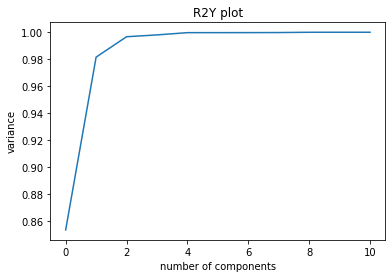

In [50]:
from sklearn.preprocessing import scale, StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import LeaveOneGroupOut, LeaveOneOut

#X_Matrix = XM = ([[rate_3g],[rate_3dfh],[rate_rt],[fraction_3g],[fraction_3dfh],[fraction_rt],[infection_time],[cd4_count],[cd4_decay],[log10_viral_load],[age]])
Y_Matrix = YM = total_rate
X_Matrix = XM = np.zeros((11,11))
for z in range (0,11):
    XM[z,0]= rate_3g[z]
    XM[z,1]= rate_3dfh[z]
    XM[z,2]= rate_rt[z]
    XM[z,3]= fraction_3g[z]
    XM[z,4]= fraction_3dfh[z]
    XM[z,5]= fraction_rt[z]
    XM[z,6]= infection_time[z]
    XM[z,7]= cd4_count[z]
    XM[z,8]= cd4_decay[z]
    XM[z,9]= log10_viral_load[z]
    XM[z,10]= age[z]
    
#print(XM[5,3])
#x input= patient number minus 1 (ex. input of 5 gives 6th patient's info) 
#y input= observation# (0 = rate_3g,...,10 = age)

R2Y=np.zeros(11)
for i in range (1,12):
    PLSR = PLSRegression(n_components=i)
    PLSR.fit_transform(scale(XM), scale(YM))
    R2y[i-1]=PLSR.score(scale(XM), scale(YM))
    
plt.plot(R2y)
plt.title('R2Y plot')
plt.xlabel('number of components')
plt.ylabel('variance')

PLSRmodel.fit_transform(scale(XM), scale(YM))
print("R^2 value with 2 components is", PLSRmodel.score(scale(XM), scale(YM)))

Our R2Y plot shows that the R^2 value with 2 components is 98%.

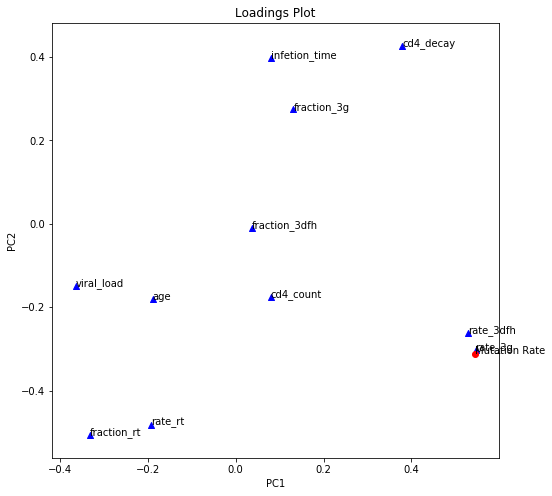

In [52]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import scale

xloadscores, yloadscores = PLSR.x_loadings_, PLSR.y_loadings_
plt.figure(figsize=(8,8))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Loadings Plot')
plt.scatter(xloadscores[:, 0], xloadscores[:, 1], c='b', marker='^')
plt.scatter(yloadscores[:, 0], yloadscores[:, 1], c='r', marker='o')

features = ['rate_3g','rate_3dfh','rate_rt','fraction_3g','fraction_3dfh','fraction_rt','infetion_time','cd4_count','cd4_decay','viral_load','age']
for i, label in enumerate(features):
    plt.annotate(label, (xloadscores[i, 0], xloadscores[i, 1]))
plt.annotate('Mutation Rate', (yloadscores[:, 0], yloadscores[:, 1]));


Our loadings plot shows two variables/components that are most directly correlated with the total mutation rate data. As predicted, the variables 'rate_3g' and 'rate_3dfh' are 2 most directly correlated variables. 

<Figure size 432x288 with 0 Axes>

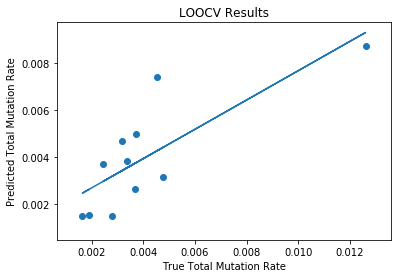

<Figure size 432x288 with 0 Axes>

In [53]:
from sklearn.model_selection import LeaveOneOut
leaveoneoutindices = np.arange(len(XM))
predictholder = np.zeros(len(XM))
leave = LeaveOneOut()

plt.figure()
plt.xlabel('True Total Mutation Rate')
plt.ylabel('Predicted Total Mutation Rate')
plt.title("LOOCV Results")

for train_index, test_index in leave.split(leaveoneoutindices):
    trainX = XM[train_index]
    trainY = YM[train_index]
    PLS = PLSRegression(n_components = 2)
    PLS.fit_transform(trainX, trainY)
    predictholder[test_index] = PLS.predict(XM[test_index])
    
plt.scatter(YM, predictholder)
plt.ylim(min(predictholder)-0.001,max(predictholder)+0.001)
plt.xlim(min(YM)-0.001,max(YM)+0.001)
m, b = best_fit_slope_and_intercept(YM,predictholder)
R = regression_line = [(m*x)+b for x in YM]
plt.plot(YM, R)
plt.figure()


Performing Leave one out cross validation with 2 components gives us good correlation between our predicted data for mutation rates, and the true data. 